# Propagation of quadratic piecewise input field to simple 3 layer guide

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex
from IPython.display import Video
from scipy.integrate import quad
from scipy.optimize import newton
%matplotlib widget
plt.style.use('dark_background')

In [2]:
A = SlabExact(symmetric=True, Ts=[3,2,3])

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

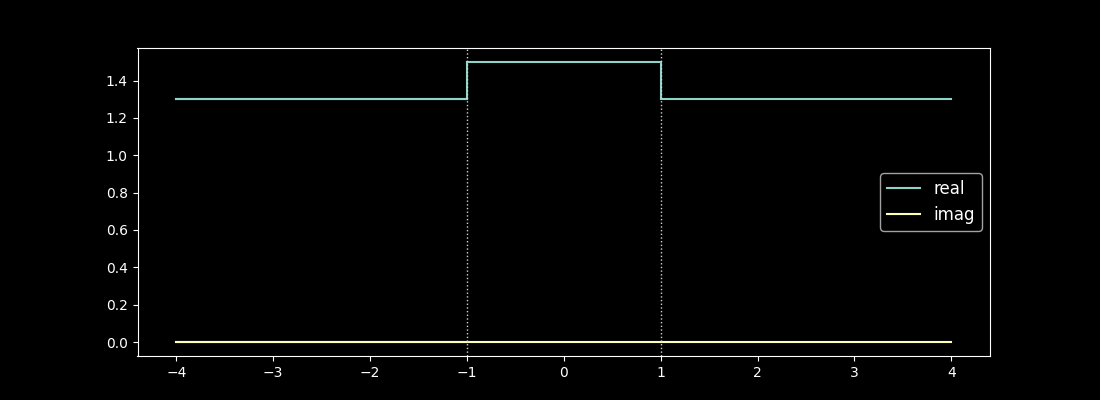

In [3]:
A.plot_refractive_index()

In [4]:
def dirac(x, tol=.007):
    return 2/tol * np.where(np.abs(x)<= tol,1,0)
    
def dirac_exact(beta, field_type='TE', sign='+1', phase=None):
    M = A.coefficients(beta, up_to_region=1, field_type=field_type, mode_type='radiation',
                      sign=sign, phase=phase)
    return beta/(2*A.K0)*np.sum(M[..., 1], axis=len(M[..., 1].shape)-1)

def f(x):
    return 1-x**2

def g(x):
    return np.exp(-x**2)

def quadratic_piecewise(x):
    conds = [(x<-1), ((-1<=x)*(x<=1)), (x>1)]
    funcs = [0, lambda x: 1-x**2, 0]
    return np.piecewise(x, conds, funcs)

def quadratic_piecewise2d(x, zs=None, wavenumber=A.K0):
    conds = [(x<-1), ((-1<=x)*(x<=1)), (x>1)]
    funcs = [0, lambda x: 1-x**2, 0]
    fx = np.piecewise(x, conds, funcs)
    fz = np.exp(1j * wavenumber * zs)
    return np.outer(fz, fx)

f0 = quadratic_piecewise

In [5]:
xs = np.linspace(-5,5,2000)

In [6]:
# A.plot_field_2d(quadratic_piecewise2d, xs=xs, zmin=-10, zmax=0, zref=100)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

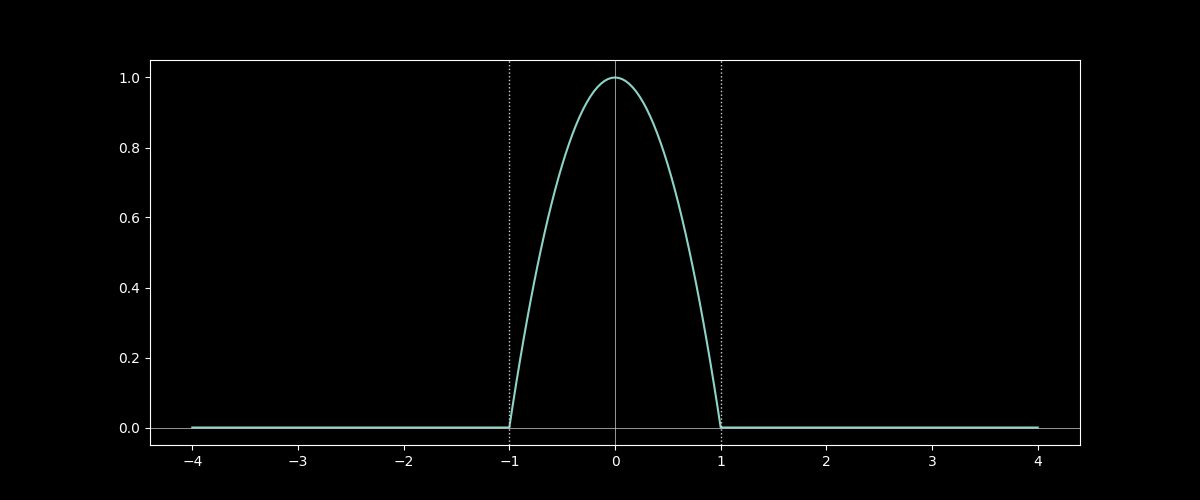

In [7]:
A.plot_field_1d(f0)

## Guided modes

In [8]:
# n0 = A.n0
# n_high = A.n_high
# A.n0 = n_high

In [12]:
# A.n0 = n0

(<Figure size 1100x500 with 2 Axes>, <Axes: >)

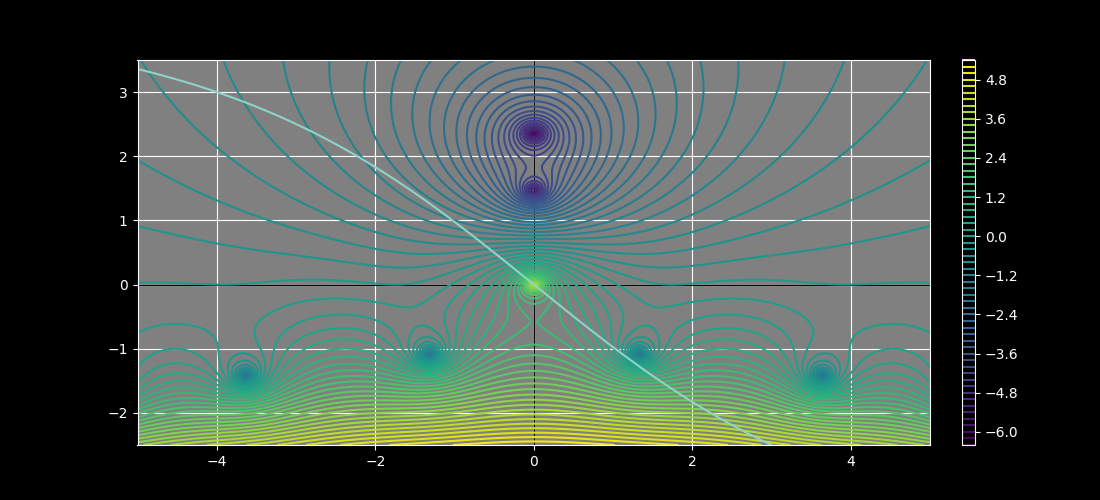

In [13]:
A.determinant_plot(-5, 5, -2.5, 3.5)

In [51]:
guesses = [2.5j, 1.5j]
Zs = np.array([newton(A.determinant, np.array(guess)) for guess in guesses])[0]
A.plot_points(Zs)

In [52]:
Fs = [A.fields(Z, mode_type='guided') for Z in Zs]
coeffs = np.array([quad(lambda x: f0(x) * F(x), -1, 1, complex_func=True)[0] for F in Fs])
coeffs

array([0.9820051+0.j])

In [85]:
x0 = 0
z0 = 0
guided_x = lambda x: sum([alpha * F(x) for (alpha, F) in zip(coeffs, Fs)])
guided_z = lambda z: sum([alpha * F(x0, z) for (alpha, F) in zip(coeffs, Fs)])
Guided = lambda x, z: sum([alpha * F(x, z) for (alpha, F) in zip(coeffs, Fs)])

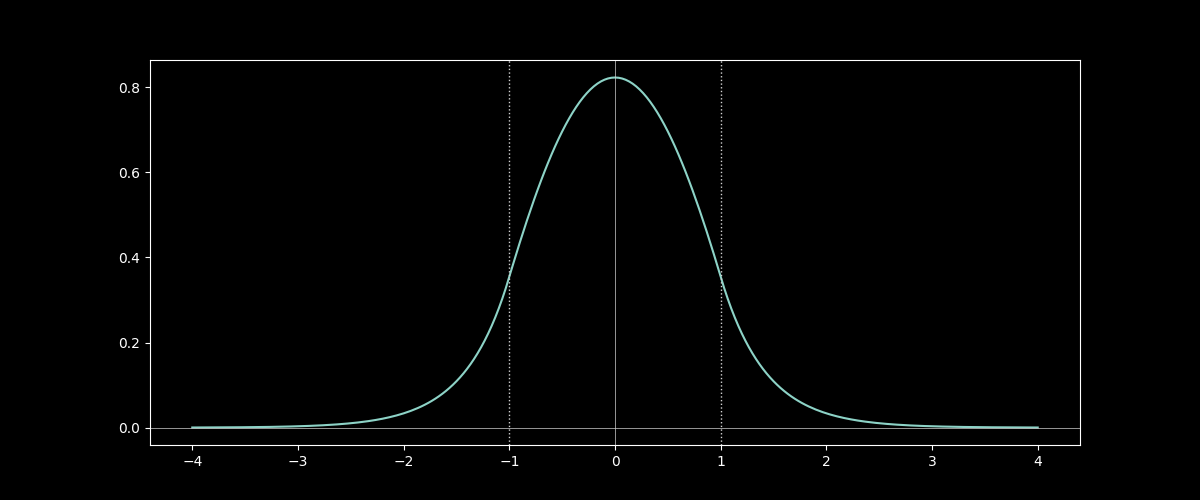

In [88]:
A.plot_field_1d(guided_x);

## Radiation Field

In [89]:
Propagator = A.propagator()

In [90]:
P = Propagator(A.real_contour(.000001, 50, 600), f0=f0, Lx=-1, Rx=1)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

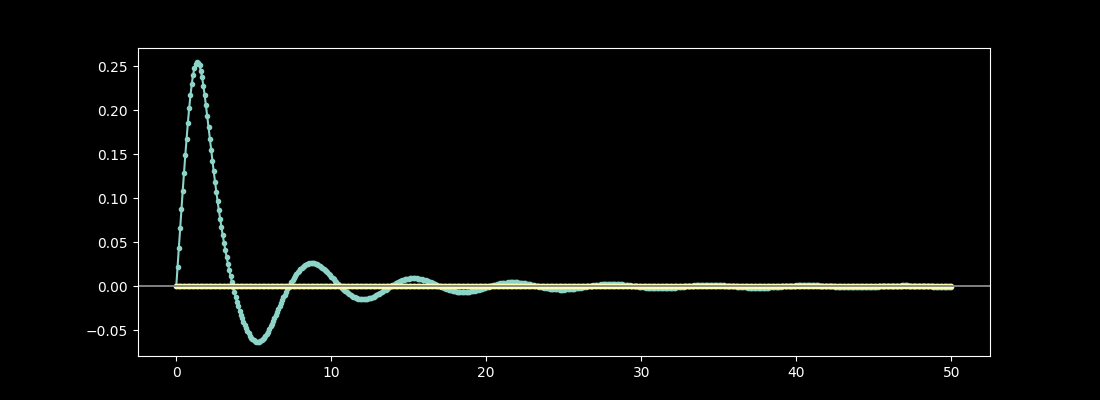

In [91]:
P.plot_transform()
P.plot_transform(ax=plt.gca(), part='imag')

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

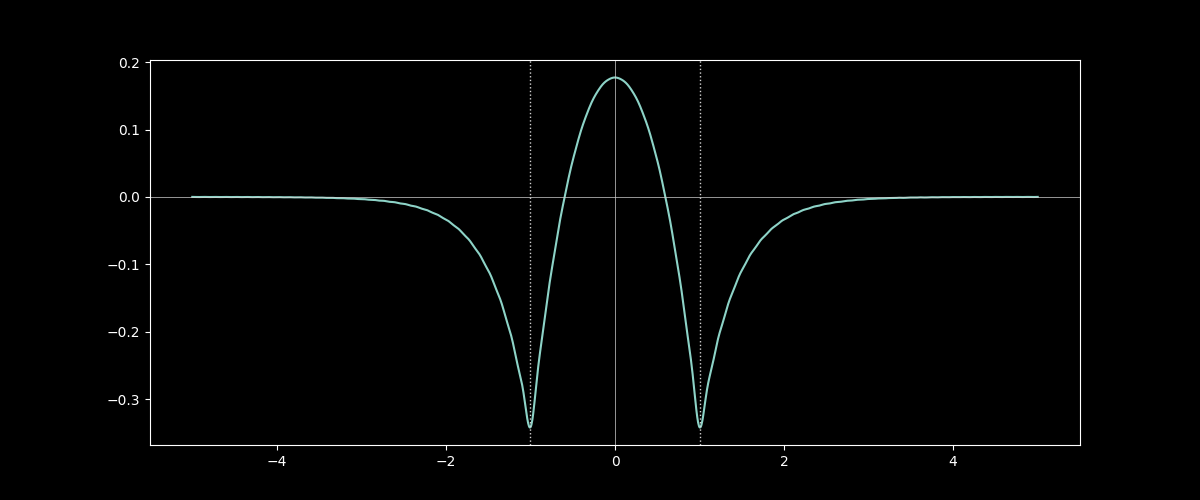

In [92]:
plt.close('all')
A.plot_field_1d(P.slice_propagate, xs=xs)

(<Figure size 1000x500 with 1 Axes>, <Axes3D: >)

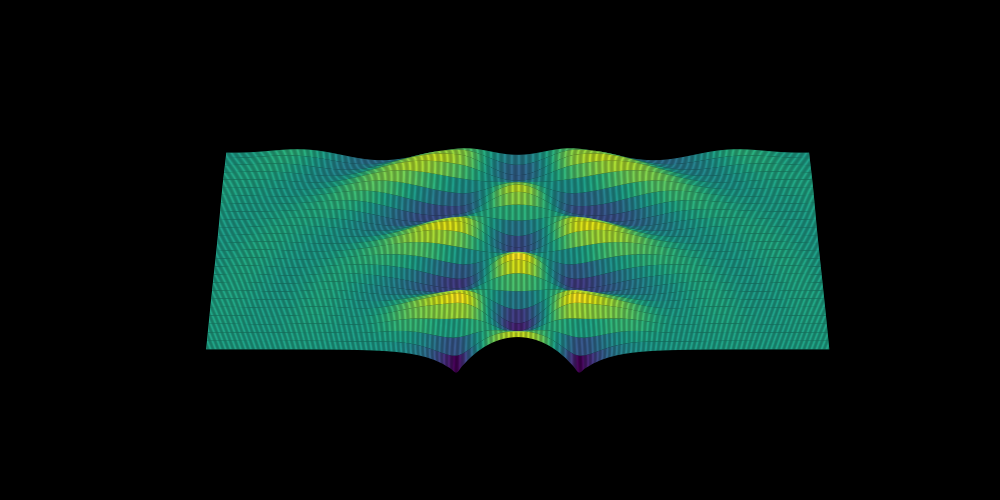

In [93]:
A.plot_field_2d_surface(P.propagate, xs=xs, part='real', zoom=2)

In [99]:
full = lambda x: P.slice_propagate(x) + guided_x(x)
Full = lambda x, z: P.propagate(x, zs=z) + Guided(x, z)

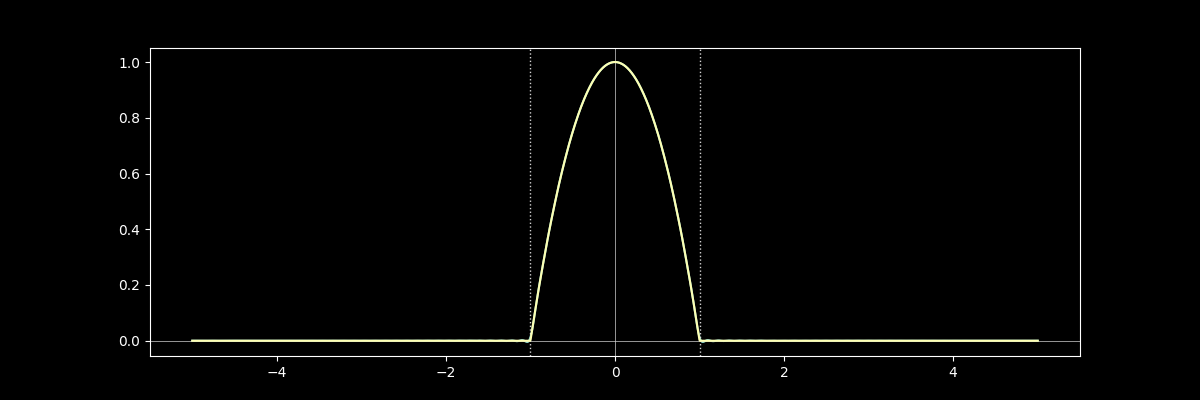

In [100]:
A.plot_field_1d(full, figsize=(12,4), xs=xs, part='real')
A.add_1d_plot(f0, xs=xs)

In [101]:
def line(xs, val=0):
    return val * np.ones_like(xs)

(<Figure size 1000x800 with 1 Axes>, <Axes: >)

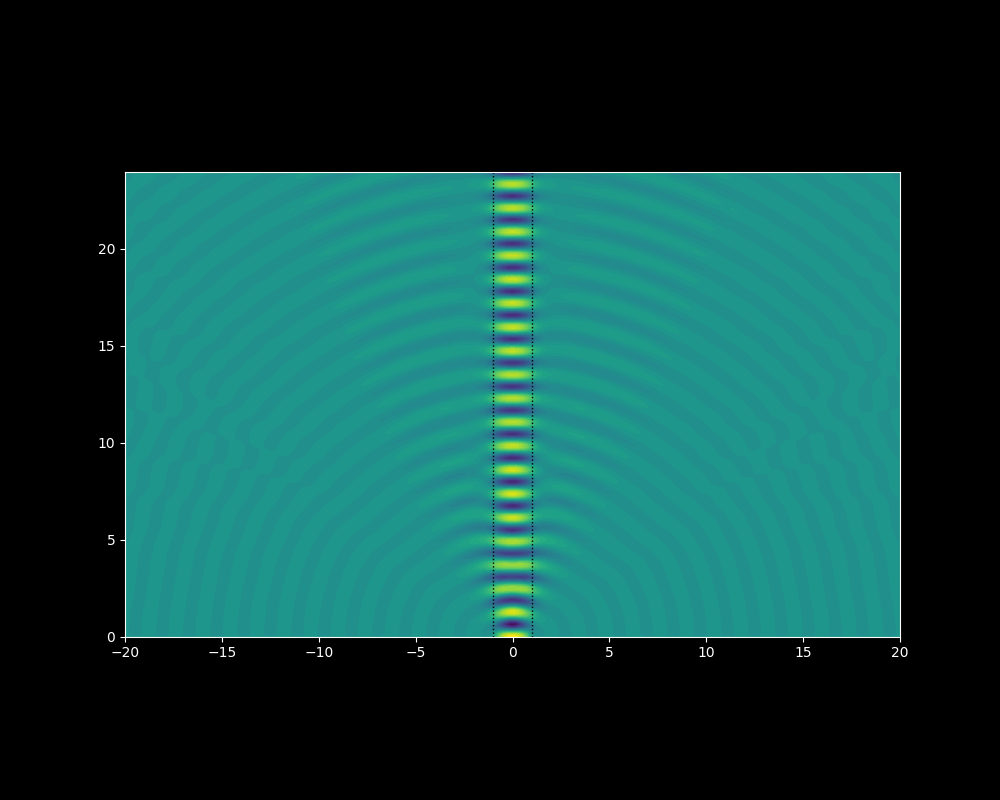

In [102]:
A.plot_field_2d(Full, xs=np.linspace(-20,20,200), colorbar=False, figsize=(10,8),
                zmax=24, zref=200,
               )
# ax = plt.gca()
# A.add_2d_plot(quadratic_piecewise2d, xs=np.linspace(-20,20,100), zs=np.linspace(-6, 0, 100))
# A.add_1d_plot(line, xs=np.linspace(-20,20,100), color='b', linewidth=.8, linestyle=':')
# ax.plot([-1, -1], [0, 24], color='b', linewidth=1, linestyle=':')
# ax.plot([1, 1], [0, 24], color='b', linewidth=1, linestyle=':');
# plt.axis('equal');